## Required IDs

occurrenceID, nameComplete, decimalLongitude and decimalLatitude


Data from GBIF database http://www.gbif.org/occurrence/download/0060414-160910150852091

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from shapely import geometry

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
os.path.isfile(fname)

In [ ]:
fname = '0060414-160910150852091.csv'

In [ ]:
f = pd.read_csv('0060414-160910150852091.csv', sep='	')

In [ ]:
f

In [ ]:
for key in f:
    print(key)

In [ ]:
f['occurrenceid'].values

In [ ]:
def extract_key_data(input_file, output_file):
    """Take a raw input file from GBIF database, and strip out non-essential info.
    Save it as a csv file, with the name provided."""
    assert os.path.isfile(fname),"{infile} was not found".format(infile=input_file)
    f = pd.read_csv(input_file, sep='	')
    df = pd.DataFrame()
    df['occurrenceid'] = f['occurrenceid']
    df['nameComplete'] = f['scientificname']
    df['date'] = f['eventdate']
    df['decimallatitude'] = f['decimallatitude']
    df['decimallongitude'] = f['decimallongitude']
    if os.path.isfile(output_file):
        print("{outfile} exists. Overwriting file.".format(outfile=output_file))
    df.to_csv(output_file, index=False)
    print("Program sucsess.")
    return

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('GBIF_data/PierisNapi.csv')

df['datetime'] = pd.to_datetime(df['date'])
df['year'] = [tmp.year for tmp in df.datetime]

In [82]:
df.head()

,occurrenceid,nameComplete,date,decimallatitude,decimallongitude,datetime,year
0,INBO:VLINDERS:00128182,"Pieris napi (Linnaeus, 1758)",1986-05-19T02:00Z,51.11353,3.32143,1986-05-19 02:00:00,1986.0
1,INBO:VLINDERS:00128162,"Pieris napi (Linnaeus, 1758)",1986-05-01T02:00Z,51.11353,3.32143,1986-05-01 02:00:00,1986.0
2,INBO:VLINDERS:00133099,"Pieris napi (Linnaeus, 1758)",1992-08-22T02:00Z,51.11305,3.46429,1992-08-22 02:00:00,1992.0
3,INBO:VLINDERS:00128536,"Pieris napi (Linnaeus, 1758)",1988-07-11T02:00Z,51.33833,3.32300,1988-07-11 02:00:00,1988.0
4,INBO:VLINDERS:00128221,"Pieris napi (Linnaeus, 1758)",1986-07-08T02:00Z,51.11353,3.32143,1986-07-08 02:00:00,1986.0


In [156]:
# Stack to get multiple years

tmp1 = df[df.year > 2000]
subsample_early = tmp1[tmp1.year < 2005]

tmp2 = df[df.year > 2010]
subsample_late = tmp2[tmp2.year < 2015]

print("Early subsample n = ", len(subsample_early))
print("Late subsample n = ", len(subsample_late))

Early subsample n =  20481
Late subsample n =  55633


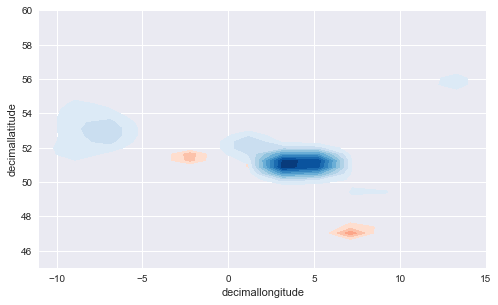

In [182]:
sns.set(style="darkgrid")
# iris = sns.load_dataset("iris")

# # Subset the iris dataset by species
# setosa = iris.query("species == 'setosa'")
# virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(subsample_early['decimallongitude'], subsample_early['decimallatitude'], 
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(subsample_late['decimallongitude'], subsample_late['decimallatitude'], 
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
plt.xlim(-11, 15)
plt.ylim(45, 60)
plt.show()

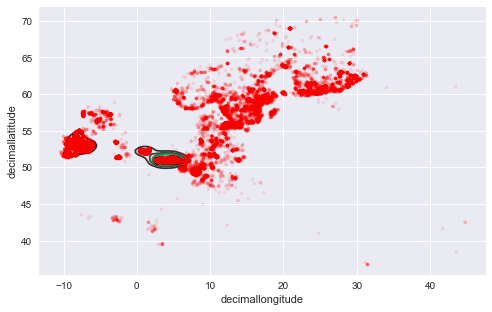

In [229]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

ypoints = subsample_late[subsample_late['decimallongitude'] > -25]['decimallatitude']
xpoints = subsample_late[subsample_late['decimallongitude'] > -25]['decimallongitude']

# Draw the two density plots
plt.plot(xpoints, ypoints,'.r', alpha=0.1)
ax = sns.kdeplot(xpoints, ypoints, shade=False, shade_lowest=False)

plt.show()

In [184]:
# Access the paths as so...
for path in ax.collections[-1].get_paths():
    x, y = path.vertices.mean(axis=0)
    print(x,y)
    #ax.plot(x, y, "ro")

3.39589565641 51.0202473245


In [155]:
my_path_eg = ax.collections[0].get_paths()[0]

In [203]:
paths = []
for path in ax.collections[1].get_paths():
    paths.append(path)

Self-intersection at or near point 0.6221727921206307 51.970121869344936


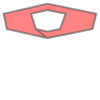

In [209]:
poly = geometry.Polygon(path.vertices)
poly

In [212]:
poly = [geometry.Polygon(p.vertices) for p in paths]
poly

Self-intersection at or near point 1.2536716230290685 50.908706448908219


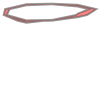

In [220]:
poly[1]

In [83]:
pd.groupby(df, by=[df.year])

In [72]:
a = df['datetime'][0]

In [106]:
#df[df.year == 2000]

In [110]:
# Stack to get multiple years

#tmp1 = df[df.year > 2008]
#tmp1[tmp1.year < 2012]

In [2]:
pn_df = pd.read_csv('GBIF_data/PierisNapi.csv')
pb_df = pd.read_csv('GBIF_data/Pieris_brassicae.csv')
va_df = pd.read_csv('GBIF_data/VanessaAtalantaLinnaeus.csv')

In [114]:
pn_df.nameComplete[0]

'Pieris napi (Linnaeus, 1758)'

In [113]:
pb_df.nameComplete[0]

'Pieris brassicae (Linnaeus, 1758)'

<IPython.core.display.Javascript object>


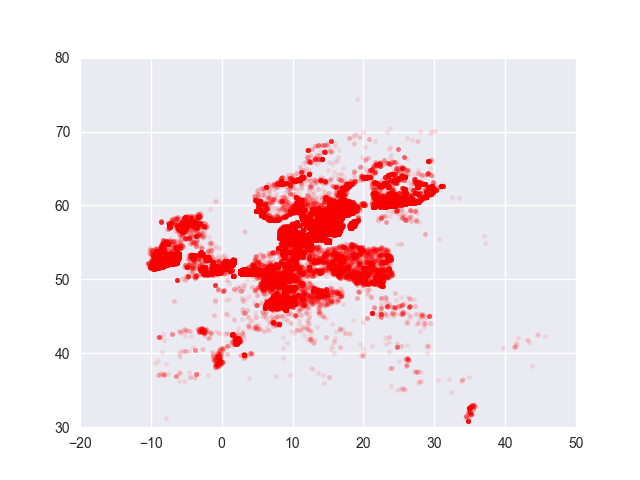

In [28]:
plt.plot(va_df.decimallongitude, va_df.decimallatitude, 'r.', alpha=0.1)
plt.xlim(-20, 50)
plt.ylim(30,80)
plt.show()

<IPython.core.display.Javascript object>


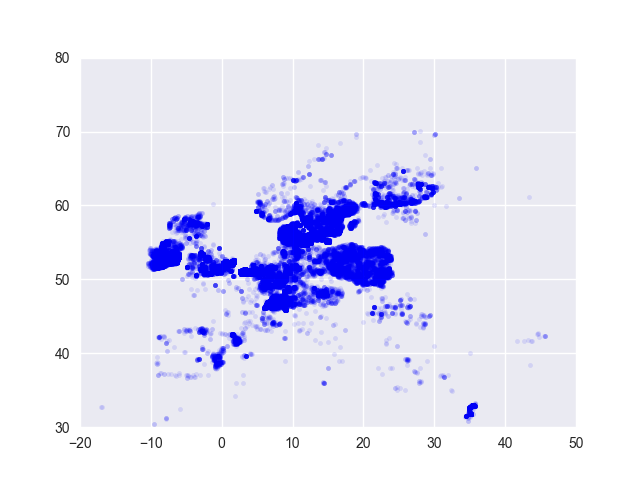

In [27]:
plt.plot(pb_df.decimallongitude, pb_df.decimallatitude, 'b.', alpha=0.1)
plt.xlim(-20, 50)
plt.ylim(30,80)
plt.show()

<IPython.core.display.Javascript object>


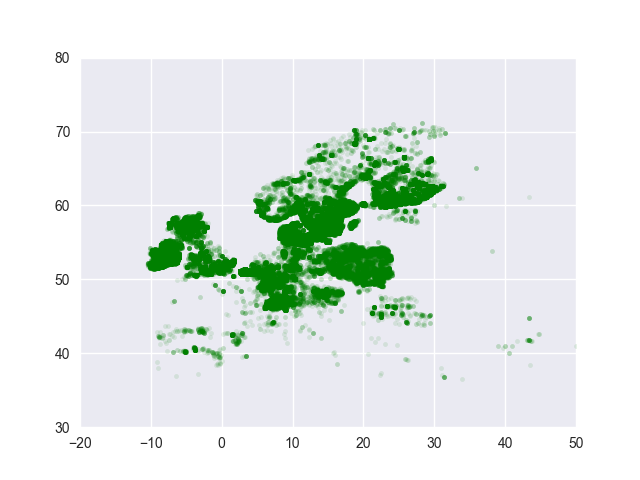

In [26]:
plt.plot(pn_df.decimallongitude, pn_df.decimallatitude, 'g.', alpha=0.1)
plt.xlim(-20, 50)
plt.ylim(30,80)
plt.show()

In [35]:
def restrict_area_of_df(df, north=80, east=50, south=30, west=-20):
    """Restrict the points in a dataframe by position"""
    tmp = df[df.decimallatitude > south]
    tmp = tmp[tmp.decimallatitude < north]
    tmp = tmp[tmp.decimallongitude > west]
    tmp = tmp[tmp.decimallongitude < east]
    return tmp

In [36]:
test = restrict_area_of_df(va_df)

<IPython.core.display.Javascript object>


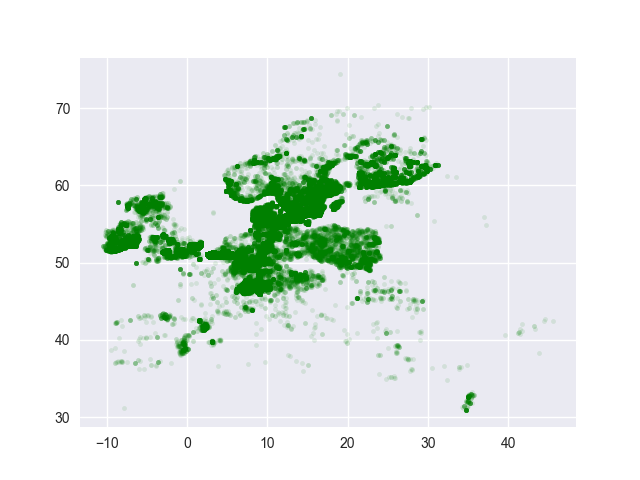

In [37]:
plt.plot(test.decimallongitude, test.decimallatitude,'g.',alpha=0.1)
plt.show()

In [39]:
test.head()

,occurrenceid,nameComplete,date,decimallatitude,decimallongitude
0,INBO:VLINDERS:00195336,"Vanessa atalanta Linnaeus, 1758",1975-08-07T01:00Z,51.20363,3.25049
1,INBO:VLINDERS:00195474,"Vanessa atalanta Linnaeus, 1758",1982-07-02T02:00Z,51.11305,3.46429
2,INBO:VLINDERS:00197251,"Vanessa atalanta Linnaeus, 1758",1991-07-28T02:00Z,51.11353,2.67856
3,INBO:VLINDERS:00197185,"Vanessa atalanta Linnaeus, 1758",1991-07-21T02:00Z,51.24859,3.25073
4,INBO:VLINDERS:00195209,"Vanessa atalanta Linnaeus, 1758",1943-10-21T01:00Z,50.87916,4.52807


In [106]:
def process_table(df):
    """blah"""
    df = df[df.date == df.date]      # exclude data with no valid time value:
    df_eu = restrict_area_of_df(df)  # exclude data outside of the EU region
    t = [pd.to_datetime(dt).date() for dt in df_eu.date]
    yr = [y.year for y in t]
    if name == 'Vanessa atalanta Linnaeus, 1758':
        species = [1] * len(df_eu)
    elif name == 'Pieris napi (Linnaeus, 1758)':
        species = [2] * len(df_eu)
    elif name == 'Pieris brassicae (Linnaeus, 1758)':
        species = [3] * len(df_eu)
    df_eu = df_eu.drop(['occurrenceid', 'date', 'nameComplete'], axis=1)
    df_eu['date'] = t
    df_eu['year'] = yr
    df_eu['species'] = species
    return df_eu

In [115]:
va_df.head()

,occurrenceid,nameComplete,date,decimallatitude,decimallongitude
0,INBO:VLINDERS:00195336,"Vanessa atalanta Linnaeus, 1758",1975-08-07T01:00Z,51.20363,3.25049
1,INBO:VLINDERS:00195474,"Vanessa atalanta Linnaeus, 1758",1982-07-02T02:00Z,51.11305,3.46429
2,INBO:VLINDERS:00197251,"Vanessa atalanta Linnaeus, 1758",1991-07-28T02:00Z,51.11353,2.67856
3,INBO:VLINDERS:00197185,"Vanessa atalanta Linnaeus, 1758",1991-07-21T02:00Z,51.24859,3.25073
4,INBO:VLINDERS:00195209,"Vanessa atalanta Linnaeus, 1758",1943-10-21T01:00Z,50.87916,4.52807


In [107]:
cleaned = process_table(va_df)

In [108]:
cleaned.head()

,decimallatitude,decimallongitude,date,year,species
0,51.20363,3.25049,1975-08-07,1975,1
1,51.11305,3.46429,1982-07-02,1982,1
2,51.11353,2.67856,1991-07-28,1991,1
3,51.24859,3.25073,1991-07-21,1991,1
4,50.87916,4.52807,1943-10-21,1943,1


<IPython.core.display.Javascript object>


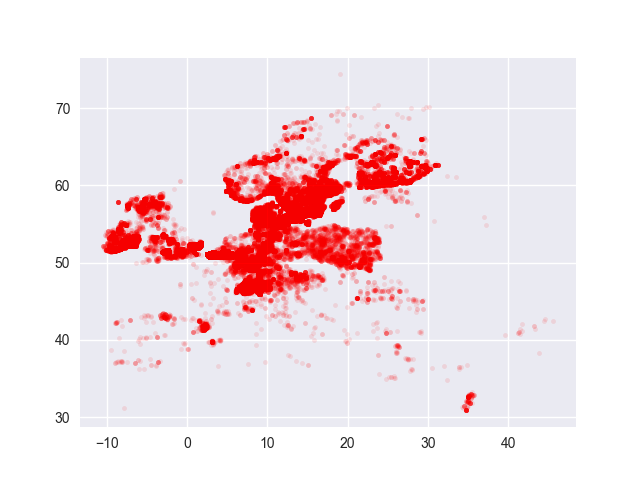

In [109]:
plt.plot(cleaned.decimallongitude, cleaned.decimallatitude,'r.', alpha=0.1)